In [1]:
import AGG

In [2]:
graph = AGG.GraphicalGenome(filename= "./HPRC/HG002.ccs.gfa")

In [3]:
anchorlist = sorted(graph.anchor.keys())
len(anchorlist), len(graph.anchor[anchorlist[0]]['seq'])

(752, 21)

In [4]:
edgelist = sorted(graph.edges.keys())
len(edgelist)

1680

In [5]:
total_base = 0
for anchor in anchorlist:
    total_base += len(graph.anchor[anchor]['seq'])

for edge in edgelist:
    total_base += len(graph.edges[edge]['seq'])

In [22]:
graph.anchor

{'A000022': {'pos': 22, 'seq': 'TAACCACTCACGGGAGCTCTC'},
 'A000044': {'pos': 44, 'seq': 'ATGCATTTGGTATTTTCGTCT'},
 'A000066': {'pos': 66, 'seq': 'GGGGGTATGCACGCGATAGCA'},
 'A000088': {'pos': 88, 'seq': 'TGCGAGACGCTGGAGCCGGAG'},
 'A000110': {'pos': 110, 'seq': 'ACCCTATGTCGCAGTATCTGT'},
 'A000132': {'pos': 132, 'seq': 'TTTGATTCCTGCCTCATCCTA'},
 'A000154': {'pos': 154, 'seq': 'TATTTATCGCACCTACGTTCA'},
 'A000176': {'pos': 176, 'seq': 'TATTACAGGCGAACATACTTA'},
 'A000198': {'pos': 198, 'seq': 'TAAAGTGTGTTAATTAATTAA'},
 'A000220': {'pos': 220, 'seq': 'GCTTGTAGGACATAATAATAA'},
 'A000242': {'pos': 242, 'seq': 'AATTGAATGTCTGCACAGCCA'},
 'A000264': {'pos': 264, 'seq': 'TTTCCACACAGACATCATAAC'},
 'A000286': {'pos': 286, 'seq': 'AAAAATTTCCACCAAACCCCC'},
 'A000308': {'pos': 308, 'seq': 'CTCCCCCGCTTCTGGCCACAG'},
 'A000330': {'pos': 330, 'seq': 'ACTTAAACACATCTCTGCCAA'},
 'A000352': {'pos': 352, 'seq': 'CCCCAAAAACAAAGAACCCTA'},
 'A000374': {'pos': 374, 'seq': 'CACCAGCCTAACCAGATTTCA'},
 'A000396': {'pos'

A002222
A002288
A002266
A002310
A002244


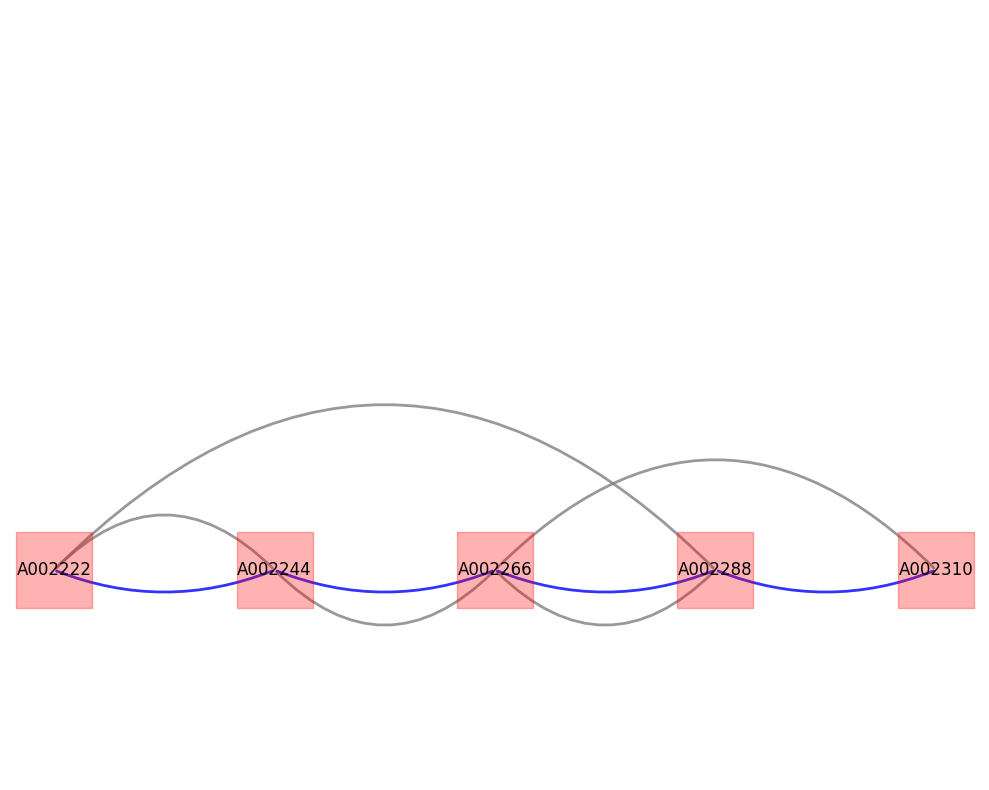

In [62]:
# plot graph topology
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Arc

G = nx.Graph()
anchor_list = anchorlist[100:103]
edge_list = []
for anchor in anchor_list:
    edge_list += graph.outgoing[anchor]
for edge in edge_list:
    anchor_list.append(graph.edges[edge]['src'][0])
    anchor_list.append(graph.edges[edge]['dst'][0])

G = nx.Graph()
for edge in set(edge_list):
    src = graph.edges[edge]['src'][0]
    dst = graph.edges[edge]['dst'][0]
    G.add_node(src)
    G.add_node(dst)
    G.add_edge(src,dst)

pos = {}
for node in G.nodes():
    print(node)
    pos[node] = (graph.anchor[node]['pos'], 1)

# Draw with specified positions
_,ax = plt.subplots(figsize = (10, 8))
nx.draw_networkx_nodes(G, pos=pos, ax = ax, node_color = 'red', node_size = 3000, node_shape = "s", alpha = 0.3)
nx.draw_networkx_labels(G, pos=pos, ax = ax)
for src,dst in G.edges():
    x1,y1 = pos[src]
    x2, y2 = pos[dst]

    # Calculate midpoint and angle
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    dx, dy = x2 - x1, y2 - y1
    dist = (dx**2 + dy**2)**0.5
    arc_height_multiplier = -0.5
    arc_height = dist * arc_height_multiplier

    connectionstyle = f"arc3,rad={arc_height_multiplier}"
    arrow = FancyArrowPatch(
        (x1, y1), (x2, y2),
        connectionstyle=connectionstyle,
        arrowstyle="-",
        mutation_scale=15.0,
        lw=2,
        alpha=0.8,
        color="grey"
    )
    ax.add_patch(arrow)

# add reference path
nodes = sorted(G.nodes())
for i in range(1, len(nodes)):
    src = nodes[i-1]
    dst = nodes[i]
    x1,y1 = pos[src]
    x2, y2 = pos[dst]

    # Calculate midpoint and angle
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    dx, dy = x2 - x1, y2 - y1
    dist = (dx**2 + dy**2)**0.5
    arc_height_multiplier = 0.2
    arc_height = dist * arc_height_multiplier

    connectionstyle = f"arc3,rad={arc_height_multiplier}"
    arrow = FancyArrowPatch(
        (x1, y1), (x2, y2),
        connectionstyle=connectionstyle,
        arrowstyle="-",
        mutation_scale=15.0,
        lw=2,
        alpha=0.8,
        color="blue"
    )
    ax.add_patch(arrow)


# final layout

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.tight_layout()
plt.show()
fig = ax.figure
fig.savefig("./paper_figure/graph_local_structure.pdf", format = "pdf", dpi = 300, transparent = True)




In [10]:
import pysam
bam_file = "./HPRC/HG002_mt.bam"
total_bp = 0
with pysam.AlignmentFile(bam_file, "rb") as bam:
    for read in bam.fetch():
        seq = read.query_sequence
        total_bp += len(seq)








In [11]:
total_bp

1013737

In [12]:
total_base/total_bp

0.04309500393099985